In [36]:
import galsim
import numpy as np
import matplotlib.pylab as plt
import astropy.io.fits as pyfits
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.patches import Circle, Ellipse

(-0.5, 127.5, -0.5, 127.5)

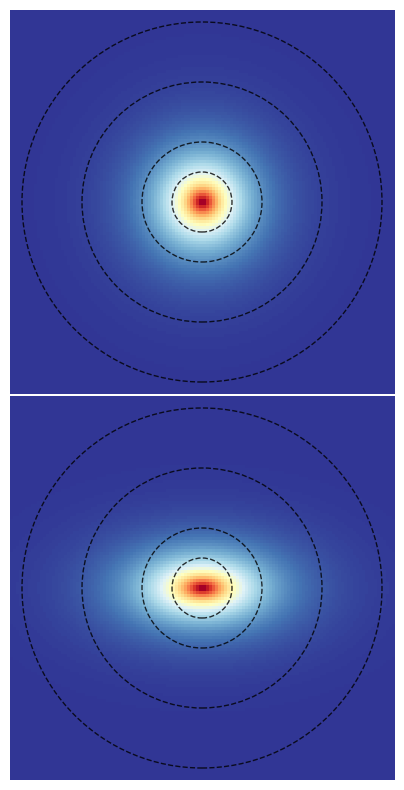

In [44]:
fig=plt.figure(figsize=(5,10))
ngrid=128
axes = ImageGrid(fig, 111, nrows_ncols=(2,1))
ax= axes[0]
ax.imshow(galsim.Exponential(scale_radius=0.4).drawImage(scale=0.04,nx=ngrid,ny=ngrid).array,
          cmap='RdYlBu_r',origin='lower',interpolation='None'
         )
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 10, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 20, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 40, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 60, color='black', fill=False, ls='--', alpha=0.8))
ax.axis('off')
ax= axes[1]
ax.imshow(galsim.Exponential(scale_radius=0.4).shear(g1=0.3).drawImage(scale=0.04,nx=ngrid, ny=ngrid).array,
          cmap='RdYlBu_r',origin='lower',interpolation='None'
         )
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 10, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 20, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 40, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 60, color='black', fill=False, ls='--', alpha=0.8))
ax.axis('off')

(-0.5, 127.5, -0.5, 127.5)

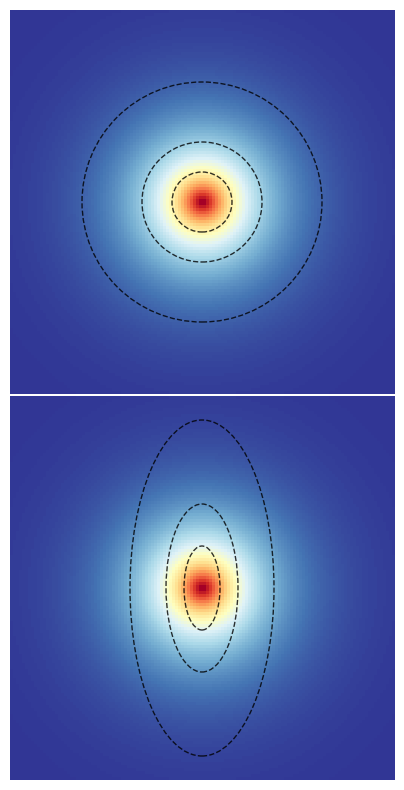

In [46]:
fig=plt.figure(figsize=(5,10))
ngrid=128
axes = ImageGrid(fig, 111, nrows_ncols=(2,1))
ax= axes[0]
ax.imshow(galsim.Exponential(scale_radius=0.6).drawImage(scale=0.04,nx=ngrid,ny=ngrid).array,
          cmap='RdYlBu_r',origin='lower',interpolation='None'
         )
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 10, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 20, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Circle((ngrid//2-0.5, ngrid//2-0.5), 40, color='black', fill=False, ls='--', alpha=0.8))
ax.axis('off')
ax= axes[1]
ax.imshow(galsim.Exponential(scale_radius=0.6).drawImage(scale=0.04,nx=ngrid, ny=ngrid).array,
          cmap='RdYlBu_r',origin='lower',interpolation='None'
         )
circle = ax.add_patch(Ellipse((ngrid//2-0.5, ngrid//2-0.5), 6*2, 14*2, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Ellipse((ngrid//2-0.5, ngrid//2-0.5), 12*2, 28*2, color='black', fill=False, ls='--', alpha=0.8))
circle = ax.add_patch(Ellipse((ngrid//2-0.5, ngrid//2-0.5), 24*2, 56*2, color='black', fill=False, ls='--', alpha=0.8))
ax.axis('off')

(-0.5, 309.5, -0.5, 309.5)

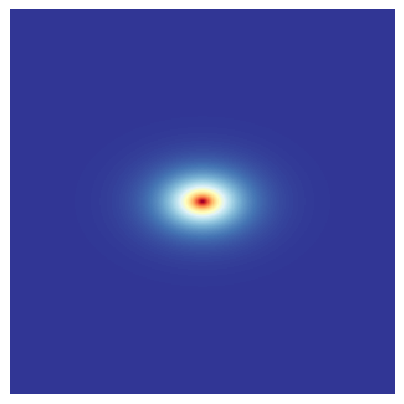

In [19]:
fig=plt.figure(figsize=(5,5))
ax = ImageGrid(fig, 111, nrows_ncols=(1,1))[0]
ax.imshow(galsim.Exponential(scale_radius=0.6).shear(g1=0.2).drawImage(scale=0.04).array,
          cmap='RdYlBu_r',origin='lower',interpolation='None'
         )
ax.axis('off')

11.334444444444445
(1010, 1010)


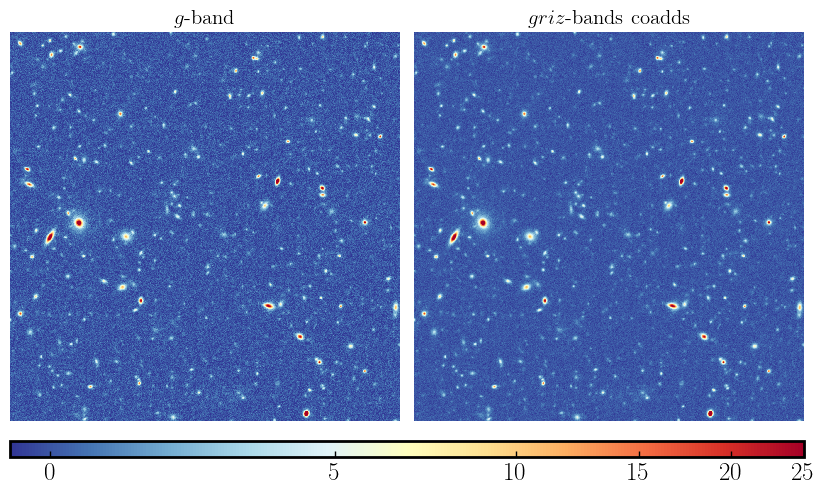

In [47]:
plt.close()
fig=plt.figure(figsize=(10,5))
axes = ImageGrid(fig, 111,     
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.05,
                 )

ax = axes[0]
ax.set_title(r'$g$-band', fontsize=15)
sim_img = pyfits.getdata('/lustre/work/xiangchong.li/work/FPFS2/sim_desc//basic/image-00001_g1-0_rot0_g.fits')
sim_img = sim_img[3100:-3100, 3100:-3100]
print((sim_img.shape[0]*0.2)**2./3600)
rng = np.random.RandomState(1)
noise = rng.normal(
    scale=0.371,
    size=sim_img.shape,
)
sim_img = sim_img + noise
ax.imshow(sim_img,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(sim_img,'asinh',asinh_a=0.2,min_cut=-0.6,max_cut=25))
ax.axis('off')

ax = axes[1]
ax.set_title(r'$griz$-bands coadds', fontsize=15)
sim_img = 0.
wlist = [0.48179905, 0.34732755, 0.13503710, 0.03583629]
for i,b in enumerate('griz'):
    tmp_img = pyfits.getdata('/lustre/work/xiangchong.li/work/FPFS2/sim_desc//basic/image-00001_g1-0_rot0_g.fits')
    sim_img = sim_img + tmp_img[3100:-3100, 3100:-3100]*wlist[i]
    
rng = np.random.RandomState(1)
noise = rng.normal(
    scale=0.2186,
    size=sim_img.shape,
)
sim_img = sim_img + noise
print(sim_img.shape)

im = ax.imshow(sim_img,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(sim_img,'asinh',asinh_a=0.2,min_cut=-0.6,max_cut=25))
ax.axis('off')

ax.cax.colorbar(im)

plt.subplots_adjust(left=0.05, right=0.95, bottom =0.05, top=0.9)
plt.savefig('plots/sim_demo.pdf')

In [48]:
1010*0.2/60

3.3666666666666667